In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = pd.read_csv("../data/train.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Problem Definition (Business Understanding)
Spaceship Titanic is a fictional competition on Kaggle.

Objective: To predict whether new passengers will be teleported or not, based on the information that the passengers are "Transported" (the state of being teleported to another dimension).

This is a binary classification problem.
The model learns to predict the Transported value (True or False) of each passenger.


# About Dataset (Dataset Overview)
Data consists of two files, train.csv and test.csv:

File Description
train.csv Training data (Passenger information + Transported tag)
test.csv Passenger information only, data to be predicted

# Data Dictionary
- PassengerId: (Passenger ID (example: '0001_01') )
- HomePlanet: (The planet the passenger departed from (Earth, Europa, Mars))
- CryoSleep: (Was the passenger in sleep mode (True/False))
- Cabin: (Passenger's cabin (example: 'B/0/P'))
- Destination: (Destination planet (TRAPPIST-1e, etc.))
- Age: (Age)
- VIP: (VIP customer? (True/False))
- RoomService:(Room service spend (₡))
- FoodCourt: (Food spend)
- ShoppingMall: (Shopping spend)
- Spa: (Spa spend)
- VRDeck: (Virtual reality deck spend)
- Name: (Passenger's full name)
- Transported: (Destination (teleported?) → True/False (only in train.csv))

# Target Variable
Transported: Boolean

Type: Binary Classification

Target: True or False → This column will be predicted.

# 1) EDA (Exploratory Data Analysis)

In [102]:
df.shape

(8693, 14)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [104]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [105]:
#  Missing Value Analysis
df.isnull().sum() # Missing value quantites

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

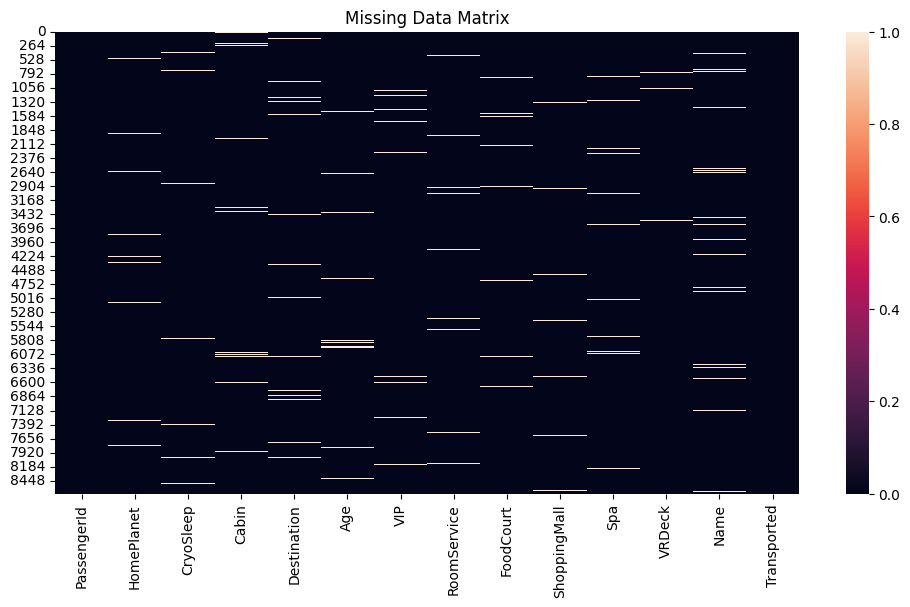

In [106]:
# To see missing values as a heatmap graphic:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())
plt.title("Missing Data Matrix")
plt.show()

In [107]:
# To see missing value percentages:
missing_value = df.isnull().sum() / len(df) * 100
missing_value[missing_value > 0].sort_values(ascending= False)

CryoSleep       2.496261
ShoppingMall    2.392730
VIP             2.335212
HomePlanet      2.312205
Name            2.300702
Cabin           2.289198
VRDeck          2.162660
FoodCourt       2.105142
Spa             2.105142
Destination     2.093639
RoomService     2.082135
Age             2.059128
dtype: float64

In [108]:
# Missing value percentages are smaller than < 2,5. That's why, we can fill them.

# we can firstly fill numerical columns(float);
# let's again check skew of value numerical columns
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [109]:
# As a result:

# Age column is = Right skewed distribution
# RoomService column is = Right skewed distribution
# FoodCourt column is = Right skewed distribution
# ShoppingMall column is = Right skewed distribution
# Spa column is = Right skewed distribution
# VRDeck column is = Right skewed distribution

# That's why, we can fill these columns as median.
cols_to_fill = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
for col in cols_to_fill:
    df[col].fillna(df[col].median(), inplace = True)

/var/folders/hx/l5k4h_l1441bnmjrv79gb0qr0000gn/T/ipykernel_1353/1372594247.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace = True)
/var/folders/hx/l5k4h_l1441bnmjrv79gb0qr0000gn/T/ipykernel_1353/1372594247.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [110]:
# we can fill categorical missing values(object)
# let's find categorical columns:
categorical_columns = df.select_dtypes(include = ["object"])
all_categoric_columns = categorical_columns.columns.tolist()

In [111]:
all_categoric_columns

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

In [112]:
# Let's analyze these columns to make decision for drop or fill
for column in all_categoric_columns:
    print(f"{column}: {df[column].nunique()}")

PassengerId: 8693
HomePlanet: 3
CryoSleep: 2
Cabin: 6560
Destination: 3
VIP: 2
Name: 8473


In [113]:
# According to analyze: PassengerId, Name, Cabin have high cardinality. If we use these columns we can have some overfitting problems.
# That's why we need to drop them, and the another columns can be fill with mode() strategy:

for col in ["HomePlanet", "CryoSleep", "Destination", "VIP"]:
    df[col].fillna(df[col].mode()[0], inplace=True)


/var/folders/hx/l5k4h_l1441bnmjrv79gb0qr0000gn/T/ipykernel_1353/3155498493.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/var/folders/hx/l5k4h_l1441bnmjrv79gb0qr0000gn/T/ipykernel_1353/3155498493.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].fi

In [114]:
df.drop(columns = ["PassengerId", "Name", "Cabin"], axis = 1, inplace = True)

In [115]:
df.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [116]:
# Missing values are no longer in our dataset.

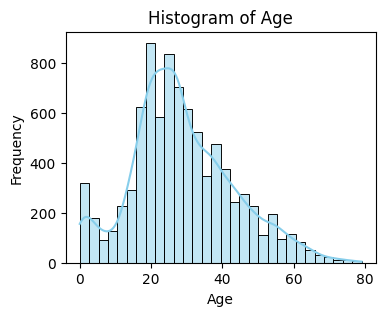

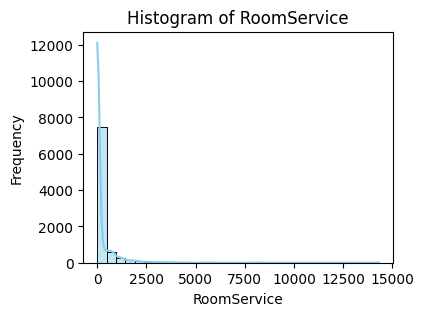

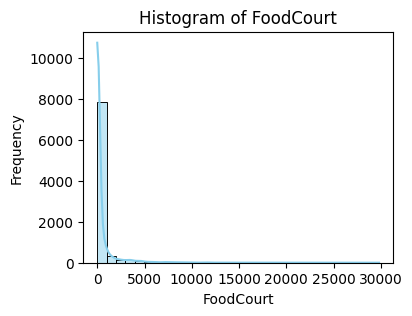

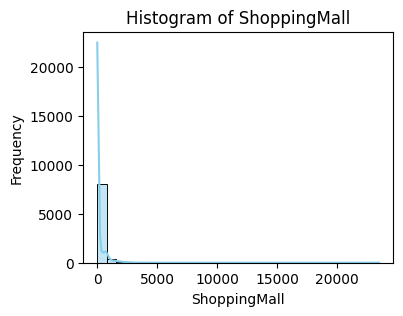

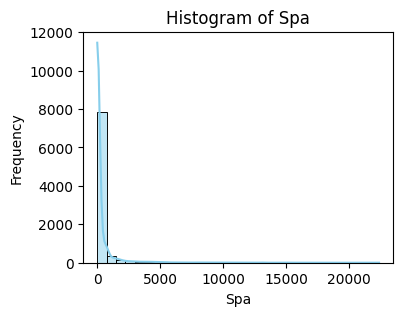

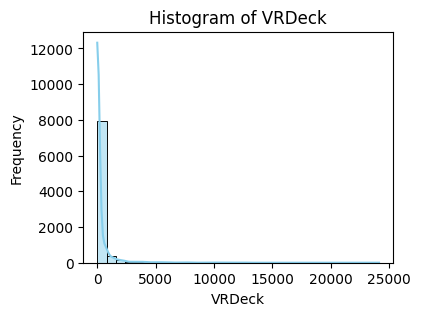

In [117]:
# We can visualize distributions of numerical and categorical columns.

# Histogram can be use for numerical columns
# Barplot can be use for categorical columns

# Firstly, Let's visualize distribution of numerical columns:
numerical_columns = df.select_dtypes(include = [float]).columns.tolist()

for num in numerical_columns:
    plt.figure(figsize = (4,3))
    sns.histplot(data = df, x = num, kde=True, color="skyblue", bins=30)
    plt.title(f"Histogram of {num}")
    plt.xlabel(num)
    plt.ylabel("Frequency")
    

/var/folders/hx/l5k4h_l1441bnmjrv79gb0qr0000gn/T/ipykernel_1353/2565054288.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= cat, palette="pastel", order= df[cat].value_counts().index)
/var/folders/hx/l5k4h_l1441bnmjrv79gb0qr0000gn/T/ipykernel_1353/2565054288.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= cat, palette="pastel", order= df[cat].value_counts().index)


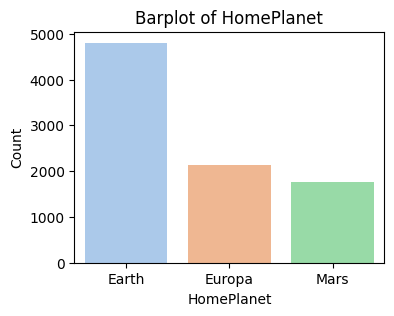

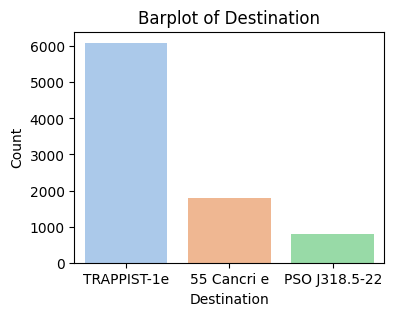

In [118]:
# Secondly, Let's visualize distribution of categorical columns:
categorical_columns = df.select_dtypes(include = [object]).columns.tolist()

for cat in categorical_columns:
    plt.figure(figsize = (4,3))
    sns.countplot(data = df, x= cat, palette="pastel", order= df[cat].value_counts().index)
    plt.title(f"Barplot of {cat}")
    plt.xlabel(cat)
    plt.ylabel("Count")

In [119]:
# Let's check correlation and multicollinearity of values with heatmap
